In [9]:
import pandas as pd
import numpy as np
from arcgis.gis import *
from ast import literal_eval

# entries with NaN in location, for young victim data
badentries = [659026, 736132, 1473914, 1532070, 1532072, 1532073, 1532086, 1532087, 1532089]

# reading in entire dataset
df=pd.read_csv('../Crime_Data_from_2010_to_Present.csv',header=0)
df.columns =['DR_Number','date_reported','date_occurred','time_occurred','area_ID','area_name','reporting_district','crime_code','crime_code_description','MO_code','victim_age','victim_sex','victim_descent',	'premise_code',	'premise_description','weapon_used_code','weapon_description','status_code','status_description','crime_code1','crime_code2','crime_code3','crime_code4','address','cross_street','location']

df

,DR_Number,date_reported,date_occurred,time_occurred,area_ID,area_name,reporting_district,crime_code,crime_code_description,MO_code,...,weapon_description,status_code,status_description,crime_code1,crime_code2,crime_code3,crime_code4,address,cross_street,location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
5,120125367,01/08/2013,01/08/2013,1400,1,Central,111,110,CRIMINAL HOMICIDE,1243 2000 1813 1814 2002 0416 0400,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,110.0,NaN,NaN,NaN,600 N HILL ST,NaN,"(34.0591, -118.2412)"
6,101105609,01/28/2010,01/27/2010,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)"
7,101620051,11/11/2010,11/07/2010,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)"
8,101910498,04/07/2010,04/07/2010,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"(34.3147, -118.4589)"
9,120908292,03/29/2013,01/15/2013,800,9,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1300,...,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,7200 SEPULVEDA BL,NaN,"(34.2012, -118.4662)"


In [10]:
'''combining similar vehicle crimes'''
# 1: burglary from vehicle: (burglary from vehicle, burglary from vehicle - attempted)
# 2: theft from vehicle (theft from motor vehicle, theft from motor vehicle - grand ($400 and over), theft from motor vehicle - petty ($950 and under), theft from motor vehicle - attempt)
# 3: vehicle stolen: (vehicle stolen, vehicle attempt stolen)
# 4: miscellaneous: (throwing object at moving vehicle, bike - attempted stolen, bike - stolen)

df.loc[df.crime_code_description.isin(['BURGLARY FROM VEHICLE', 'BURGLARY FROM VEHICLE - ATTEMPTED']), 'crime_code_description'] = 'BURGLARY FROM VEHICLE'

df.loc[df.crime_code_description.isin(['VEHICLE - STOLEN', 'VEHICLE - ATTEMPT STOLEN']), 'crime_code_description'] = 'VEHICLE STOLEN'

df.loc[df.crime_code_description.isin(['THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)', 
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 
        'THEFT FROM MOTOR VEHICLE - ATTEMPT',
        'THEFT FROM VEHICLE']), 'crime_code_description'] = 'THEFT FROM VEHICLE'

df.loc[df.crime_code_description.isin(['THROWING OBJECT AT MOVING VEHICLE','BIKE - ATTEMPTED STOLEN', 'BIKE - STOLEN']), 'crime_code_description'] = 'MISCELLANEOUS'

df

,DR_Number,date_reported,date_occurred,time_occurred,area_ID,area_name,reporting_district,crime_code,crime_code_description,MO_code,...,weapon_description,status_code,status_description,crime_code1,crime_code2,crime_code3,crime_code4,address,cross_street,location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
5,120125367,01/08/2013,01/08/2013,1400,1,Central,111,110,CRIMINAL HOMICIDE,1243 2000 1813 1814 2002 0416 0400,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,110.0,NaN,NaN,NaN,600 N HILL ST,NaN,"(34.0591, -118.2412)"
6,101105609,01/28/2010,01/27/2010,2230,11,Northeast,1125,510,VEHICLE STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)"
7,101620051,11/11/2010,11/07/2010,1600,16,Foothill,1641,510,VEHICLE STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)"
8,101910498,04/07/2010,04/07/2010,1600,19,Mission,1902,510,VEHICLE STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"(34.3147, -118.4589)"
9,120908292,03/29/2013,01/15/2013,800,9,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1300,...,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,7200 SEPULVEDA BL,NaN,"(34.2012, -118.4662)"


In [11]:
'''filtering data to vehicle related crimes'''
vehicle_related = ['BURGLARY FROM VEHICLE', 'THEFT FROM VEHICLE', 'VEHICLE STOLEN', 'MISCELLANEOUS']
vehicle_crime = df[df.crime_code_description.isin(vehicle_related)]
print("total vehicle related crime (2010-2017)"),
print(vehicle_crime.shape[0])

total vehicle related crime (2010-2017)
351197


In [12]:
'''filter by most recent years: 2014, 2015, 2016-2017'''
veh_in2014 = vehicle_crime[vehicle_crime.date_occurred.str.endswith('14')]
print("total vehicle related crime (2014)"),
print(veh_in2014.shape[0])
veh_in2015 = vehicle_crime[vehicle_crime.date_occurred.str.endswith('15')]
print("total vehicle related crime (2015)"),
print(veh_in2015.shape[0])

veh_in2016_17 = vehicle_crime[vehicle_crime.date_occurred.str.endswith('16') | vehicle_crime.date_occurred.str.endswith('17')]
print("total vehicle related crime (2016-2017)"),
print(veh_in2016_17.shape[0])

total vehicle related crime (2014)
39234
total vehicle related crime (2015)
46316
total vehicle related crime (2016-2017)
97228


In [13]:
# getting vehicle related subcrimes for 2014
subcrimes_in2014 = veh_in2014.groupby('crime_code_description')
summ_in2014 = subcrimes_in2014.size()
summ_in2014

crime_code_description
BURGLARY FROM VEHICLE    13074
MISCELLANEOUS             1263
THEFT FROM VEHICLE       10947
VEHICLE STOLEN           13950
dtype: int64

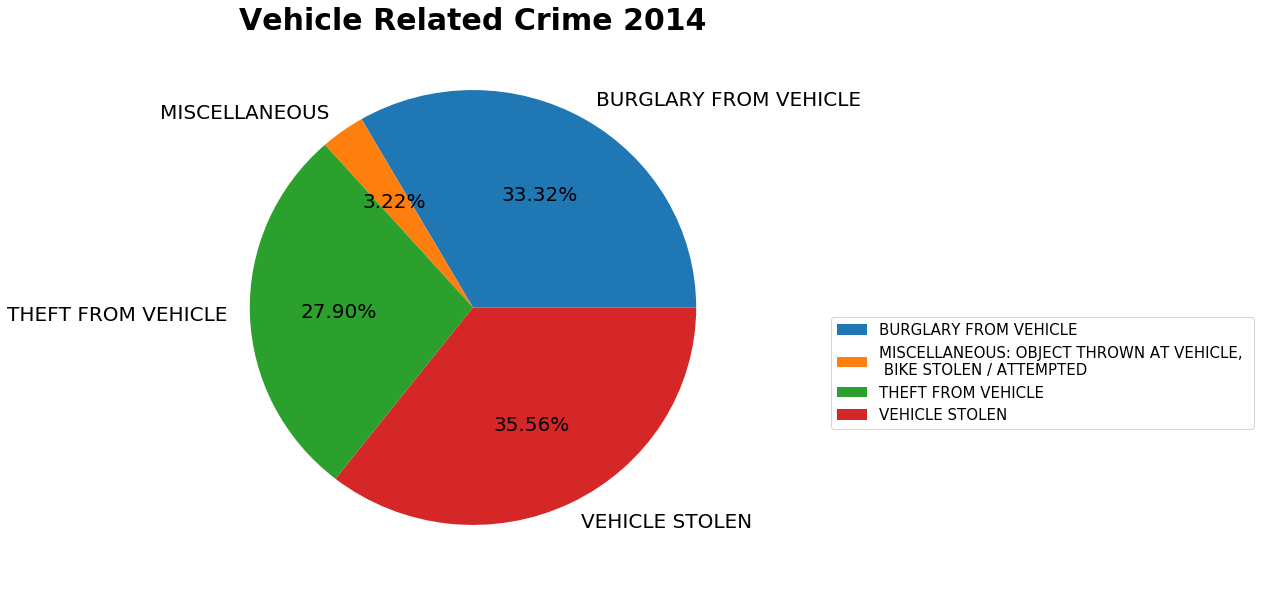

In [73]:
#pie plot of vehicle related subcrimes for 2014
import matplotlib.pyplot as plt

summ_in2014.plot.pie(labels=['BURGLARY FROM VEHICLE', 'MISCELLANEOUS', 'THEFT FROM VEHICLE', 'VEHICLE STOLEN'], autopct='%.2f%%', fontsize=20, figsize=(10,10))
plt.title('Vehicle Related Crime 2014', weight='bold', size=30)
plt.legend(loc = 'best',labels =['BURGLARY FROM VEHICLE', 'MISCELLANEOUS: OBJECT THROWN AT VEHICLE, \n BIKE STOLEN / ATTEMPTED', 'THEFT FROM VEHICLE', 'VEHICLE STOLEN'], bbox_to_anchor=(1,0.5), fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.ylabel('') # get rid of left y-axis label
plt.show()